$\newcommand{\calf}{{\cal F}}
\newcommand{\calk}{{\cal K}}
\newcommand{\calp}{{\cal P}}
\newcommand{\call}{{\cal L}}
\newcommand{\calg}{{\cal G}}
\newcommand{\cals}{{\cal S}}
\newcommand{\dnu}{d \nu}
\newcommand{\dmu}{d \mu}
\newcommand{\dmup}{d \mu'}
\newcommand{\mf}{{\bf F}}
\newcommand{\md}{{\bf D}}
\newcommand{\mP}{{\bf P}}
\newcommand{\mU}{{\bf U}}
\newcommand{\ms}{{\bf S}}
\newcommand{\vu}{{\bf u}}
\newcommand{\vx}{{\bf x}}
\newcommand{\vw}{{\bf w}}
\newcommand{\vy}{{\bf y}}
\newcommand{\vf}{{\bf f}}
\newcommand{\vs}{{\bf s}}
\newcommand{\ve}{{\bf e}}
\newcommand{\vc}{{\bf c}}
\newcommand{\vq}{{\bf q}}
\newcommand{\vd}{{\bf d}}
\newcommand{\vb}{{\bf b}}
\newcommand{\vg}{{\bf g}}
\newcommand{\vz}{{\bf z}}
\newcommand{\vr}{{\bf r}}
\newcommand{\mg}{{\bf G}}
\newcommand{\ml}{{\bf L}}
\newcommand{\mg}{{\bf G}}
\newcommand{\mv}{{\bf V}}
\newcommand{\ma}{{\bf A}}
\newcommand{\mi}{{\bf I}}
\newcommand{\mm}{{\bf M}}
\newcommand{\mb}{{\bf B}}
\newcommand{\mt}{{\bf T}}
\newcommand{\ball}{{\cal B}}
\newcommand{\ptc}{{\Psi TC}}
\newcommand{\diag}{\mbox{diag}}
\newcommand{\frechet}{{Fr\'echet\ }}
$

In [1]:
include("fanote_init.jl")

## Files for this Chapter

- From the Package repository:
  - Case Studies: __/src/TestProblems/CaseStudies__
    - Pseudo Arc Length form of the H-equation: __Hequation.jl__
    - Continuation Code: __knl_continue.jl__
    - Heat Transfer: __CR_Heat.jl__
- H-equation: __src/TestProblems/Systems/Hequation.jl__    
- From the Notebook repository: __/src/Chapter5__
   - Julia codes that generate the plots and the tables

# Chapter 5: Case studies



## Section 5.1: Conductive-Radiative Heat Transfer

In this section we consider a multi-physics problem where conductive
and radiative heat transfer are coupled. Our description of the
problem is from 
<cite data-cite="ctk:xferheat"><a href="siamfa.html#ctk:xferheat">(Kel96)</cite>,
<cite data-cite="ctk:xferheat2"><a href="siamfa.html#ctk:xferheat2">(BK98)</cite>,
<cite data-cite="ctk:xferheat3"><a href="siamfa.html#ctk:xferheat3">(BK99)</cite>.
These
models have applications to
the study of porous materials
such as fibers, powders, and foams
used in insulations at either very low or very high temperatures,
heat treatment of ceramics, and the thermal properties of coated materials,
<cite data-cite="ozisik"><a href="siamfa.html#ozisik">(M. 73)</cite>,
<cite data-cite="siegelhowell92"><a href="siamfa.html#isiegelhowell92">(SH92)</cite>,
<cite data-cite="viskanta65"><a href="siamfa.html#viskanta65">(Vis65)</cite>.

### Section 5.1.1: The Equations

We begin with the continuous formulation of the
normalized and dimensionless equations for the problem
<cite data-cite="ozisik"><a href="siamfa.html#ozisik">(M. 73)</cite>,
<cite data-cite="siegelhowell92"><a href="siamfa.html#isiegelhowell92">(SH92)</cite>,
<cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>,
<cite data-cite="cesheat2"><a href="siamfa.html#cesheat2">(Sie95)</cite>.
We will focus
on one of the simpler problems in <cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>.
Our formulation
is taken directly from <cite data-cite="ctk:xferheat2"><a href="siamfa.html#ctk:xferheat2">(BK98)</cite>.

We will discuss one way to discretize the problem in a later section.
We refer the reader to
<cite data-cite="ozisik"><a href="siamfa.html#ozisik">(M. 73)</cite>,
<cite data-cite="siegelhowell92"><a href="siamfa.html#isiegelhowell92">(SH92)</cite>,
<cite data-cite="viskanta65"><a href="siamfa.html#viskanta65">(Vis65)</cite>
for the derivation of the
equations.

The unknowns are
the dimensionless intensity $\psi(x,\mu)$
of radiation at a point $x$ in the direction
having cosine $\mu$ with the positive $x$ axis and the dimensionless
temperature $\Theta(x)$ at $x$.

The radiative transport equation is
$$
\mu \dfrac{\partial \psi}{\partial x} (x,\mu) + \psi(x,\mu) =
\dfrac{c(x)}{2} \int_{-1}^1 \psi(x, \mu') \dmup + (1 - c(x)) \Theta^4(x),
$$
for $x \in (0,\tau)$ with boundary conditions
$$
\psi(0,\mu)= \Theta_l^4, \ \mu > 0
$$
and
$$
\psi(\tau, \mu) = \Theta_r^4,  \ \mu < 0.
$$
Here
$$
0 \le c(x) \le 1 \mbox{ for all $x \in [0,\tau]$.}
$$
We assume that $c$ is continuous.

$\psi$ is the
__angular flux__.
Define the
__scalar flux__
$$
f(x) = \frac{1}{2} \int_{-1}^1 \psi(x, \mu') \dmup.
$$

The temperature $\Theta$ satisfies the boundary value problem
$$
\frac{\partial^2 \Theta}{\partial x^2} = Q(x), x \in [0,\tau], \,
\Theta(0) = \Theta_l, \Theta(\tau) = \Theta_r,
$$
and couples to the radiative transport equation by
$$
Q(x)
= \frac{1}{2 N_c} \frac{d}{dx} \int_{-1}^1 \mu' \psi(x, \mu') \dmup,
$$
where $N_c$ is the conduction to radiation parameter
<cite data-cite="ozisik"><a href="siamfa.html#ozisik">(M. 73)</cite>.

The order of integration and differentiation
in the definition of $Q$ can be changed 
<cite data-cite="ctk:xferheat"><a href="siamfa.html#ctk:xferheat">(Kel96)</cite>    
and we obtain, using the transport equation \eqnok{transport} and
the definition of $f$,
$$
\begin{array}{ll}
\dfrac{d}{dx} \int_{-1}^1 \mu' \psi(x, \mu') \dmup
& = \int_{-1}^1 \mu' \frac{\partial}{\partial x} \psi(x, \mu') \dmup\\
\\
& = - 2 (1 - c(x)) f(x) + 2 (1 - c(x)) \Theta^4(x).
\end{array}
$$
Hence,
$$
Q(x) = \alpha(x) (\Theta^4(x) - f(x)), 0 < x < \tau
$$
where
$$
\alpha(x) = (1 - c(x))/N_c.
$$


### Section 5.1.2: Formulation as a Fixed Point Problem

We will formulate the equations as a fixed point problem for $\Theta$
( _ie_ we __expose__ $\Theta$).
We could have equally well used a fixed point problem for $f$. Decisions
like this are common for multi-physics problems and chosing which variables
to expose can be a subtle problem.

In Section __5.1.5__ we will show that the transport equation
is equivalent to a linear
integral equation for $f$
$$
f - \call_1 f = \call_2(\Theta^4) + g
$$
where $\call_1$ and $\call_2$ are compact operators on $C[0,\tau]$ and $g \in C[0,\tau]$
depends on the boundary data. We can solve the integral equation efficiently with
GMRES, for example, and that is what we will do for our computations.

The operators $\call_1$ and $\call_2$ are related by
$$
\call_1 w = \calk(c w) \mbox{ and } \call_2 w = \calk ((1 - c) w).
$$
The operator $\calk$ is defined for $u \in C[0,\tau]$ by
$$
\calk(u)(x) = \int_0^\tau k(x,y) u(y) dy
$$
where
$$
k(x,y) = \frac{1}{2} \int_0^1 \exp(|x - y|/\mu) \frac{\dmu}{\mu}.
$$
Our discretization will be based on the derivation of the integral equation
and not directly on the integral equation itself. In this way one does
not have to struggle with a quadrature rule for integrals against $k(x,y)$.

So, given $\Theta$, one can recover $f$ via
$$
f = (I - \call_1)^{-1} ( \call_2 (\Theta^4) + g).
$$

Let $D_2^{-1}$ be the solution operator for
$$
\frac{\partial^2 u}{\partial x^2} = h(x); \ u(0) = u(\tau) = 0,
$$
and
$$
\Theta_0(x) = (1 - x) \Theta_l + x \Theta_r.
$$
Then \eqnok{heat} is equivalent to
$$
\Theta = D_2^{-1} Q + \Theta_0.
$$
Recall that the discretization of of the second derivative operator is a tridiagonal matrix
and hence $D_2^{-1}$ can be applied efficiently.

Hence, we can combine the equations above to obtain
a fixed point problem for $\Theta$.
$$
\begin{array}{ll}
\Theta & = \calg(\Theta) \equiv D_2^{-1} Q  + \Theta_0 \\
\\
& = D_2^{-1} ( \alpha (\Theta^4 - f) )  + \Theta_0\\
\\
& = D_2^{-1} (\alpha (\Theta^4 - (I - \call_1)^{-1} ( \call_2 (\Theta^4) + g) ))
+ \Theta_0.
\end{array}
$$

We will compare Newton-Krylov methods with Anderson acceleration for
this problem. Either approach needs an efficient evaluation of the
discretization of the fixed point map $\calg$. The steps in the
evaluation of $\calg$ are

-  1. Given $\Theta$ solve the transport equation by solving the integral form with an iterative method.
-  2. Use the solution $f$ of the transport equation from step 1 to build $Q = \alpha (\Theta^4 - f)$.
-  3.  Compute $\calg(\Theta) = D_2^{-1}(Q) + \theta_0$ with a fast solver.


We have covered step 3 previously and will discuss step 1 in
Sections __5.1.3__ and __5.1.4__

### Section 5.1.3: Derivation of the Integral Form of the Transport Equation

We begin with a more general form of the transport equation
$$
\mu \frac{\partial \psi}{\partial x} (x,\mu) + \psi(x,\mu) =
\frac{c(x)}{2} \int_{-1}^1 \psi(x, \mu') \dmup + q(x)
$$
for $x \in (0,\tau)$ with boundary conditions
$$
\psi(0, \mu) = F_l(\mu), \mu > 0; \psi(\tau, \mu) = F_r(\mu),
\mu < 0.
$$
in the equation
$\tau < \infty$, $c, q \in C([0,\tau])$, and
$F_l$ and $F_r$ are given continuous real valued functions of $\mu$.
It is known
<cite data-cite="busb"><a href="siamfa.html#busb">(Bus60)</cite>
that the boundary value problem
has a unique solution
if $0 \le c(x) < 1$.

We begin with the continuous form of the source iteration map. Suppose
the scalar flux $f$ is known, then
we can recover $\psi$ by integration. For $\mu > 0$
we integrate the transport equation forward in $x$ (__forward sweep__) obtaining
$$
\psi(x,\mu) = \frac{1}{\mu} \int_0^x \exp({-(x-y)/\mu}) (c f+q)(y) dy
+ \exp(-x/\mu) F_l(\mu), \, \mu > 0.
$$
Similarly, for $\mu < 0$, we integrate backwards (__backward sweep__) to obtain,
$$
\begin{array}{ll}
\psi(x,\mu)  & = - \frac{1}{\mu} \int_x^\tau
\exp({-(x-y)/\mu}) (c f+q)(y) dy + \exp({(\tau - x)/\mu}) F_r(\mu) \\
\\
& = \frac{1}{|\mu|} \int_x^\tau \exp({-|x-y|/|\mu|}) (c f+q)(y) dy + \exp({-|\tau - x|/|\mu|}) F_r(\mu).
\end{array}
$$
The two computations of the
angular flux
via the forward and backward ieeps are a
__transport sweep__.

Integrating the forwared and backward sweeps in $\mu$ and adding the
results leads to a linear fixed point equation for $f$.
$$
f = \cals(f, F_l, F_r, q) \equiv \calk (c f) + \calk (q) + g
$$
where $\calk$ is given above and
$$
g(x) = \frac{1}{2} \int_0^1 \exp(-x/\nu) F_l(\nu)  \dnu
+ \frac{1}{2} \int_0^1 \exp(-(\tau - x)/\nu) F_r(-\nu) \dnu
= \cals(0, F_l, F_r, 0).
$$
This completes the derivation of the the map from $\Theta$ to $f$ with
$$
q = (1 - c) \Theta^4, \ F_l = \Theta_l^4, \mbox{ and } F_r = \Theta_r^4.
$$
The map $\cals$ is the
__source iteration map__.

The
__source iteration__ method for solving the integral form is simply
$$
f_{n+1} = \cals(f_n, F_l, F_r, q)
$$
which is Picard iteration for the linear integral equation form of
the transport equation. However, source iteration does not need
to compute $k(x,y)$ or the integral operator. Instead the action of
the integral operator on $f$ and $q$ and the construction of
$g$ are done by solving two initial value problems for the forward and
backward sweeps.
    
One must formulate the source iteration fixed point problem as a linear equation
to use a Krylov method. The way to do this is to solve
$$
f - \call_1 f = b
$$
where the operator-vector product for $\call_1$ can be expressed as 
$$
\call_1 f = \cals(f, 0, 0, 0)
\mbox{ and }
b = \cals(0, F_l, F_r, q).
$$
Hence an operator-vector product costs one transport sweep. Note that
there is no convenient matrix representation of $\call_1$ and that
matrix-free methods such as Krylov methods or source iteration
are the only sensible way to solve the problem.



### Section 5.1.4: Discretization

We begin with a spatial mesh on $[0,\tau]$ with mesh width $h=\tau/(n+1)$ and $x_j = (j-1) h$.
We will discretize the map $D_2$ with the usual central difference scheme and let $\md_2$ be that discretization.

For the transport equation we will use the discrete ordinates approach
<cite data-cite="larnel"><a href="siamfa.html#larnel">(LN92)</cite>,
<cite data-cite="scott"><a href="siamfa.html#scott">(PS83)</cite>,
 <cite data-cite="ctk:abtrans"><a href="siamfa.html#ctk:abtrans">(KEL95b)</cite>.
    
We construct our sequence of approximate source iteration maps with the
diamond difference discretization. We use a variation on
the notation of \cite{larnel}. We let $\vf$, $\vq$, and $\vc$
be the evaluations of
$f$, $q$, and $c$ at the spatial grid points.
$$
f_i = f(x_i), q_i = q(x_i), \mbox{ and } c_i = c(x_i).
$$
We let
$\{ \mu_j \}_{j=1}^{N_A}$ and
$\{ w_j \}_{i=1}^{N_A}$ be the nodes and weights for a
quadrature rule in angle. The optimal quadrature for this application
is a {\bf double Gauss} rule, which is Gaussian quadratues for each
of the intervals $[-1,0)$ and $(0,1]$ separately    
<cite data-cite="scott"><a href="siamfa.html#scott">(PS83)</cite>.
We use a double 20 point rule for this application and
obtained the nodes and weights from the Julia package __QuadGK.jl__
<cite data-cite="QuadGK"><a href="siamfa.html#QuadGK">(Joh13)</cite>.
One could also use __FastGaussQuadrature.jl__
<cite data-cite="fastgaussjl"><a href="siamfa.html#fastgaussjl">(Olv21)</cite>
or copy the data from an old table <cite data-cite="gausstab"><a href="siamfa.html#gausstab">(DR56)</cite>,
which is what we did in <cite data-cite="ctk:abtrans"><a href="siamfa.html#ctk:abtrans">(KEL95b)</cite>.
    
We solve the subproblem for $f$ with GMRES and give a tolerance of
$tol = 10^{-12}$ to the linear solver. Therefore we expect the
nonlinear residual to be accurate to (roughly) twelve figures. In light
of this we set the difference increment for the finite-difference
Jacobian-vector product to $dx = 10^{-5}$. 

The diamond difference method first computes
approximations $\psi_i^j$ to $\psi(x_i, \mu_j)$ by computing
$\psi_i^j$ for each $i$ with $j$ fixed.
The discretized forward integration $(\mu_j > 0)$ is
$$
\begin{array}{l}
\mu_j \dfrac{\psi^j_i - \psi^j_{i-1}}{h}
+ \dfrac{\psi^j_i + \psi^j_{i-1}}{2}\\
\\
= \dfrac{c_i f_i + c_{i-1} f_{i-1}}{2} +
\dfrac{q_i + q_{i-1}}{2}, \, \mu_j > 0,
\end{array}
$$
with initial data $\psi^j_1 = \psi(0, \mu_j) = F_l(\mu_j)$.
Similarly the discretized backward integration $(\mu_j < 0)$ is
$$
\begin{array}{l}
\mu_j \dfrac{\psi^j_i - \psi^j_{i+1}}{h}
+ \dfrac{\psi^j_i + \psi^j_{i+1}}{2}\\
\\
= \dfrac{c_i f_i + c_{i+1} f_{i+1}}{2} +
\dfrac{q_i + q_{i+1}}{2}, \, \mu_j < 0,
\end{array}
$$
with final data $\psi^j_{N} = \psi(\tau,\mu_j) = F_r(\mu_j)$.

Following the forward and backward integration we compute the discrete
source iteration map
$$
\ms (\vf)_i = \dfrac{1}{2} \sum_{j=1}^{N_A} \psi^j_i w_j.
$$
Similarly to the derivation of the continous source iteration map,
$\vq$ and the boundary data are
built into $\{\psi^j_i\}$ by the way in which the integration is done.
Hence we also write the discrete source iteration map as
$$
\ms(\vf, F_l, F_r, \vq).
$$
So the discretized linear integral equation form of the transport
equation is
$$
\vf = \ms(\vf, F_l, F_r, \vq) \equiv \ml_1( \vf ) + \vb
$$
where
$$
\ml_1 f = \ms(f, 0, 0, 0) \mbox{ and }
\vb = \ms(0, F_l, F_r, \vq).
$$

We obtain the discretization of the linear map from $\Theta$ to $\vf$
as before with the substitution $\vq = (1 - c) \Theta^4$ where products
are understood to be component wise. We let $\mt$
and $\mt_0$ be the discretizations
of $\Theta$ and $\Theta_0$. The discretization of $\call_2$
is
$$
\ml_2 (\mt^4) = \ms(0, 0, 0, (1 - c) \mt^4).
$$
The discretized fixed point problem for $\Theta$ is
$$
\mt = \mg(\mt) \equiv
\md_2^{-1} ( \alpha \mt^4 -
(I - \ml_1)^{-1} ( \ml_2 (\mt^4) + \vg) )
+ \mt_0.
$$
Here
$$
\vg = \ms(0, F_l, F_r, 0).
$$

The Julia code for the fixed point map is in __CR_Heat.jl__ in the
__/src/TestProblems/CaseStudies__ directory


### Section 5.1.5: Examples for Conductive-Radiative Heat Transfer

The example in this section is taken from
<cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>. Transport
theory has a generous supply of benchmark problems and this is one.
We begin by comparing results with the tables in
<cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>.
We use an $N=1001$ point grid so that the tabulated data are at mesh
points.  We consider the two problems:

- Problem 1: $N_c = .05, \omega = .9, \tau=1, \Theta_l = 1, \Theta_r = 0$
- Problem 2: $N_c = .05, \omega = .9, \tau=1, \Theta_l = 1, \Theta_r = .5$

We solve the problems with Anderson(2).

The results agree to all figures reported with column two of Tables
2 and 3 in <cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>.


In [2]:
heat_tabulate();

  x          Theta1          Theta2 
 0.00     1.00000e+00     1.00000e+00 
 0.10     9.18027e-01     9.54270e-01 
 0.20     8.36956e-01     9.11008e-01 
 0.30     7.53557e-01     8.68433e-01 
 0.40     6.65558e-01     8.25127e-01 
 0.50     5.71475e-01     7.79940e-01 
 0.60     4.70505e-01     7.31936e-01 
 0.70     3.62437e-01     6.80375e-01 
 0.80     2.47544e-01     6.24709e-01 
 0.90     1.26449e-01     5.64610e-01 
 1.00     0.00000e+00     5.00000e-01 


We close this section with a comparison of Anderson($m$) for several
values of $m$ and Newton-GMRES on three instances of the
convective-radiative heat transfer problem. We begin with
Problem 1 from the table above and then vary $\omega$,
$\tau$, and $\theta_r$. The first problem is easy and
Figure __5.1__ shows that Anderson($2$) is clearly
a good choice.

The fixed point maps are not contractive for the second two problems.
For the problem in Figure __5.2__ Anderson($m$) shows irregular convergence,
but for $m > 0$ recovers well.  Figure __5.3__ shows that
Picard iteration diverges for the last of
the problems. Our code __aasol.jl__ halts the iteration with a failure
message once the residual norm increases by a factor of $10^4$, as it
did for Picard iteration in this example.
Notice that Newton-GMRES has a far more regular and predictable
convergence behavior for the two non-contractive problems. This regularity
is an important advantage and it is not clear that Anderson acceleration is a reasonable
alternative. For example, in both Figures __5.2__ and __5.3__ Anderson($10$), needs over twice the storage
of the Newton-GMRES iteration.


Diverging for m=5 in aasol.jl.
thetar = 2.00000e+00, tau=4.00000e+00, omega=5.00000e-01
Failure to converge after 50 iterations for m=20 in aasol.jl
thetar = 2.00000e+00, tau=4.00000e+00, omega=5.00000e-01


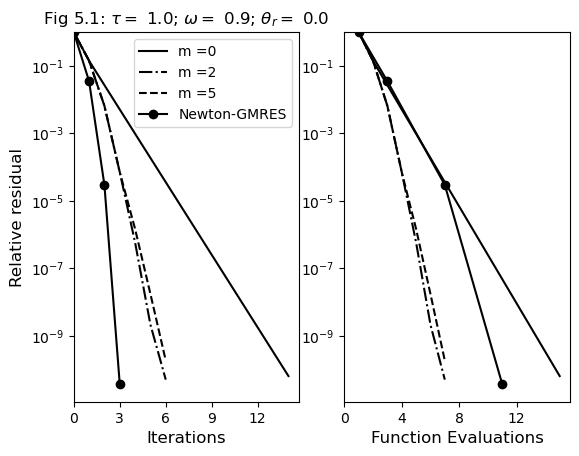

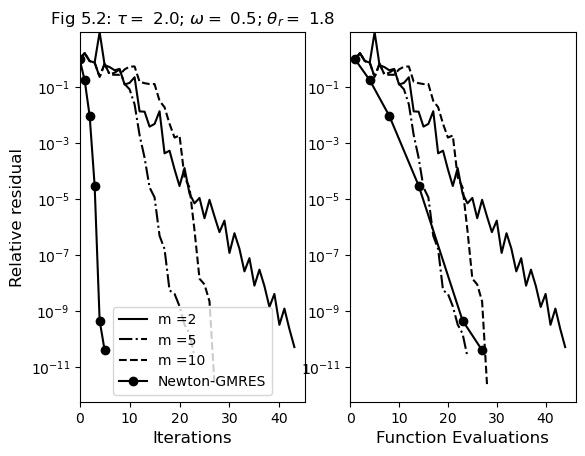

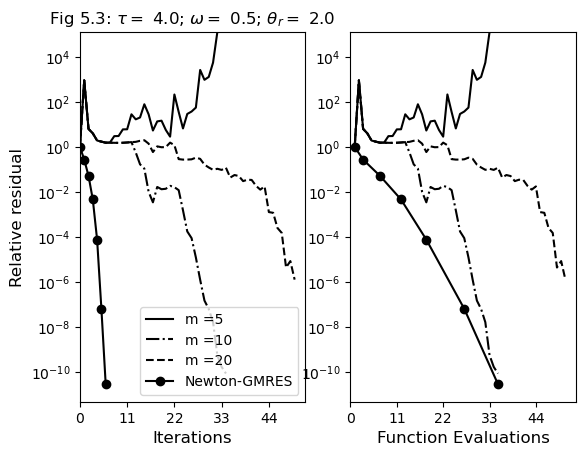

In [3]:
vary_xferheat_parms();

## Section 5.2: A Continuation Problem for the $H$-equation

In this section we will explore some properties of the solution of
$H$-equation as a function of the parameter $c$. As before, we will do the the analysis
for the continuous problem, but the results are valid for any discretization
with a quadrature rule with positive weights that integrates constants
exactly.

We have seen other examples
of parameter-dependent nonlinear equations in
the buckling beam problem from Chapters __2__ and __3__
and the cubic polynomial example
in Chapter __1__. These examples have
pitchfork bifurcations <cite data-cite="herb"><a href="siamfa.html#herb">(Kel87)</cite>
and most path following codes
<cite data-cite="doedel"><a href="siamfa.html#doedell">(Doe97)</cite>,
<cite data-cite="govaerts"><a href="siamfa.html#govaerts">(Gov00)</cite>,
<cite data-cite="kuznetsov"><a href="siamfa.html#kuznetsov">(Kuz98)</cite>,
<cite data-cite="loca"><a href="siamfa.html#loca">(SBRP<sup>+</sup>02)</cite>,
<cite data-cite="pitcon"><a href="siamfa.html#pitcon">(Rhe86)</cite>,
<cite data-cite="bifkit"><a href="siamfa.html#bifkit">(Vel20)</cite>,
have machinery to detect intersecting solution arcs and
follow the different branches. Those methods are beyond
the scope of this book. The Julia package __BifurcationKit.jl__
<cite data-cite="bifkit"><a href="siamfa.html#bifkit">(Vel20)</cite>
is quite complete. Our example of the $H$-equation
is the simplest possible case.

### Section 5.2.1: Properties of $H$ as a function of $c$



Recall that the equation in $C[0,1]$ is
$$
\calf(H)(\mu) =
H(\mu) - \frac{1}{1 - \frac{c}{2} \int_0^1 \frac{\mu H(\mu)}{\mu+\nu} \dnu} = 0.
$$
We will also refer to the fixed point form of the equation
$$
H(\mu) = \calg(H)(\mu) = \left( 1 - \frac{c}{2}
\int_0^1 \frac{\mu H(\mu)}{\mu+\nu} \dnu \right)^{-1}.
$$

We will use an alternative form of the $H$-equation to compute
the $L^1$ norm of $H$.
$$
H(\mu) = 1 + \frac{c}{2} H(\mu) \int_0^1 \frac{\mu}{\mu + \nu} H(\nu) \dnu.
$$

Integrating both sides of the alternative formulation yields
$$
\| H \|_1 =
1 + \frac{c}{2} \int_0^1 \int_0^1 H(\mu) H(\nu) \frac{\mu}{\mu + \nu} \dnu.
$$
Since $\mu$ and $\nu$ are variables of integration, we may interchange
them to obtain
$$
\| H \|_1 =
1 + \frac{c}{2} \int_0^1 \int_0^1 H(\mu) H(\nu) \frac{\nu}{\mu + \nu} \dnu.
$$
When we average the two equations we obtain
$$
\| H \|_1 =
1 + \frac{c}{4} \| H \|_1^2.
$$
So
$$
\| H \|_1  = \frac{1 \pm \sqrt{1 - c}}{c/2}.
$$

As we said in Chapter __2__, the H-equation has two solutions
for $0 < c < 1$.  The
__lower branch__, where $\| H \|_1  = \frac{1 - \sqrt{1 - c}}{c/2}$
is the solution of physical interest and the one you're likely to find
with any iteration. In this section we will explore computation of the
__upper branch__, where $\| H \|_1  = \frac{1 + \sqrt{1 - c}}{c/2}$.

The formula for the $L^1$ norm implies that the $H$-equation has no real
solutions for $c > 1$. This implies that the Frechet
derivative
$\calf'$ of $\calf$ must be singular. The solution path cannot stop
abruptly <cite data-cite="crandall"><a href="siamfa.html#crandall">(CR71)</cite>,
so there must be an upper
branch. The formula for the $L^1$ norm implies that $\| H \|_1 \to \infty$ as $c \to 0$
on the upper branch.

We will briefly consider the details of the singularity before
following the path. We begin by showing that $\calf'(H)$ is nonsingular
for $0 \le c < 1$ on the lower branch. To simplify the analysis we define
the linear operator $\call$ on $C[0,1]$ by
$$
(\call u)(\mu) = \int_0^1 \frac{\mu u(\nu)}{\mu + \nu} \dnu
$$
and express the $H$-equation as
$$
H = \frac{1}{1 - (c/2) \call H}
$$
where the division is understood to be pointwise. Now
note that for $u \in C[0,1]$,
$$
\calf'(H) u = u - \frac{(c/2) \call u}{(1 - (c/2) \call H)^2}
 = u - (c/2) H^2  \call u.
$$
Here we use, as we have before, the simple trick to compute a Frechet
derivative
$$
\calf'(H)u = \frac{d}{d \epsilon} \calf(H + \epsilon u)
\bigg|_{\epsilon = 0 }.
$$
Since $\calf'$ is the sum of a compact operator and the identity, it is
singular only if $0$ is an eigenvector. So singularity of $\calf'$ is
equivalent to $\calg'(H)$ having $\sigma(c) = 1$ as an eigenvalue.
    
When $c = 1$, the Perron theorem
<cite data-cite="karlin"><a href="siamfa.html#karlin">(Kar59)</cite>
and the positivity of the
$H$-function imply that the largest eigenvalue in absolute value
of $\calg'(H)$ is positive and the corresponding eigenfunction
does not change sign, and hence can be taken as
non-negative. That eigenvalue is $\sigma(1)= 1$ and the eigenfunction
is $u(\mu) = \mu H(\mu)$. To see this use the formula for the $L^1$ norm and compute,
with $\| H \|_1 = 2$,
$$
\begin{array}{ll}
\calg'(H)(u)(\mu) & = H^2(\mu) (1/2) \int_0^1 \frac{\mu \nu H(\nu)}{\mu + \nu}
\dnu \\
\\
& = (\mu H(\mu)) H(\mu) (1/2) \int_0^1 \frac{\nu H(\nu)}{\mu + \nu} \dnu \\
\\
& = u(\mu) H(\mu) (1/2) \int_0^1 H(\nu) (1 - \frac{\mu}{\mu + \nu} ) \dnu \\
\\
& = u(\mu) \left( H(\mu) - (1/2) (H \call H)(\mu) \right) = u(\mu)
\end{array}
$$
Since $u \ge 0$, $\sigma(1) = 1$ is the Perron eigenvalue. Therefore
the eigenvalue has multiplicity one.

The Perron theory is also applicable if $0 < c < 1$. Let
$\sigma(c) > 0$ be the Perron eigenvalue of
$\calg'(H)$ with eigenfunction $u$. Set $u(\mu) = \mu H(\mu) p(\mu)$.
Then
$$
\begin{array}{ll}
\sigma(c) p(\mu)  & =  H(\mu) (c/2) \int_0^1
\frac{H(\nu) p(\nu) \nu}{\mu + \nu} \dnu
\le \| p \|_\infty H(\mu) (c/2) \int_0^1 \frac{H(\nu) \nu}{\mu + \nu} \dnu\\
\\
& \le \| p \|_\infty H(\mu) (c/2)
\int_0^1 H(\nu) \left(1 - \frac{\mu}{\mu + \nu} \right) \dnu
= \| p \|_\infty H(\mu) (1 - \sqrt{1-c} ) - (H(\mu) - 1)\\
\\
& = \| p \|_\infty (1  - H(\mu) \sqrt{1-c} )
\le \| p \|_\infty (1 - \sqrt{1-c})
\end{array}
$$
Hence, taking the $L^\infty$ norm of the left side of the above,
we have
$$
\sigma(c) \le 1 - \sqrt{1-c} < 1.
$$
Hence $\calf'(H)$ is nonsingular for $0 < c < 1$ on the lower branch.
This also proves the norm estimate from Chapter __4__.
    
For $c=1$, $\calf'(H)$ is singular with a one-dimensional null space.
To complete the analysis of the singularity we need to make the dependence
in $c$ explicit and write the equation as
$$
\calf(H, c) = 0.
$$
We let $\calf'_H$ be the
Frechet derivative in $H$ and
$\calf'_c(H,c)$ be the derivative in $c$. At the solution,
$$
\calf'_c(H,c) = - H^2 \frac{1}{2} \call H.
$$
So, using the H-equation, 
$$
\calf'_c(H,1) = - H (H - 1).
$$
    
The singularity at $c=1$ is a
__simple fold__ <cite data-cite="herb"><a href="siamfa.html#herb">(Kel87)</cite>.
This means that $\calf'(H)$ has a null space
of dimension 1 and that $\calf'_c(H,1) \not \in {\cal R}(\calf'_H(H))$.
Here $\cal{R}$ denotes the range of an operator. In this case
$$
{\cal R}(\calf'_H(H)) = \{ u \in C[0,1] \, | \,
\int_0^1 u(\nu) \psi(\nu) \dnu = 0 \},
$$
where $\psi$ is the eigenfunction of $\calf'_H(H)^*$, the adjoint of
$\calf'_H(H)$ corresponding to the zero eigenvalue. The reader can
verify that, for $c=1$,
$$
\psi(\mu) = (\calg'(H)^* \psi)(\nu) = \frac{1}{2} \int_0^1
\frac{\nu}{\nu+\mu} H^2(\nu) \psi(\nu) \dnu
$$
is satisfied by $\psi = H^{-1}$. Since $H \ge 1$ and $\calf'_c(H,1)$ does
not change sign, $\calf'_c(H,1)$ cannot be in the range
of $\calf'_H(H)$. We will show why this fact is important in the next
section.



### Section 5.2.2: Parameter Continuation

The object of continuation methods is to solve
a parameter dependent set of nonlinear equations
$$
\mf(\vx, \lambda) = 0.
$$
The output is a
__solution arc__
or
__solution path__ 
$$
\{ \vx(\lambda) \, | \, \mf(\vx(\lambda), \lambda) = 0,
\lambda_0 \le \lambda \le \lambda_{max} \}.
$$
The solution arc for the H-equation is a simple arc
with no bifurcations. Because of this we can use a
straightforward path following algorithm. The
objective of this section is to show how a nonlinear solver
can be modified in a simple way to resolve singularities
such as the one for the $H$-equation at $c=1$.


    
One simple approach to computing a solution path would be to
identify a solution $\vx(\lambda_0)$ for a particular
value of $\lambda$ and then increment $\lambda$ by a small amount
and use Newton's method with an initial iterate from the previous
solution to compute the solution for the next step. In the
case of the $H$-equation, where the parameter is $c$. One can
use $c_0 = 0$ and $H \equiv 1$ to begin the continuation.

A candidate for the algorithm is __natural parameter continuation__
where we increment the original parameter in the equation. Note that in
the discussion in this section, as is common practice, the parameter is
called $\lambda$ in the context of a general method, but the actual
name of the parameter ($c$ in the case of the H-equation) is used when
talking about specific examples.
    
<div>
<img src="Images/Alg5dot1.png" width="500"/>
</div>    

One can solve the nonlinear equation for $\vx$ with any iterative method.
In this section we use only Newton-GMRES with a finite-difference
Jacobian-vector product. Our reasons for this are that
we can use the same method for all continuation algorithms and that
it is the most efficient choice for the H-equation. We will discuss this
in more depth later.

One other point is that $\vx(\lambda)$ is not the best choice
for the initial iterate (the predictor) for the
nonlinear equation for $\vx(\lambda + d_\lambda)$. We use the
linear (secant) predictor \cite{herb} in our codes
$$
\vx_0 (\lambda + d_\lambda) = 2 \vx(\lambda) - \vx(\lambda - d_\lambda)
$$
once we have two solutions on the path.

Natural parameter continuation is rarely used in practice because it
is unable to resolve even the simplest singularities. The reason for this
is clear for the $H$-equation. If we set $c_0 = 0$ and start the
continuation, the iteration has to fail as soon as $c + d_c > 1$
because there are no real solutions for $c > 1$.
    
The singularity of the $H$-equation is particularly simple. Following
<cite data-cite="herb"><a href="siamfa.html#herb">(Kel87)</cite>
we consider a solution arc
$$
\cals =
\{ \vx(\lambda) \, | \, \mf(\vx(\lambda), \lambda) = 0,
\lambda_0 \le \lambda \le \lambda_{max} \}.
$$
We say the path is
__regular__
if
$$
Rank [\mf'_\vx, \mf'_\lambda] = N
$$
for all points on the path. Here, as in the previous section,
$\mf'_\vx$ is the Jacobian of $\mf$ in the $\vx$ variables and
$\mf'_\lambda = d \mf/d\lambda$.

The solution path for the $H$-equations is regular as we can see
from the following lemma (Lemma 4.2 from <cite data-cite="herb"><a href="siamfa.html#herb">(Kel87)</cite>).
    
---    
__Lemma:__
$Rank [\mf'_\vx, \mf'_\lambda] = N$ if and only if one of

- $\mf'_\vx$ is nonsingular.
- The null space of $\mf'_\vx$ has dimension $1$ and
$\mf'_\lambda \not \in {\cal R}(\mf'_\vx)$.
---

We showed that (at least for the lower branch up to $c=1$) that
the solution path for the $H$-equation is regular. The upper branch
is also regular with $\calf'(H)_H$ nonsingular for the upper branch
where $0 < c < 1$. We leave it to the reader to verify that.

Not all solution arcs are regular. The pitchfork bifurcation where two
solution arcs intersect is not a regular point and the algorithm we
use in this section is not sufficient to identify a such
a bifurcation and differentiate between stable and unstable branches.

One can resolve any singularity on a regular path with an appropriate
reparameterization. One clever way is to swap $\lambda$ with a component
of $\vx$ (see <cite data-cite="pitcon"><a href="siamfa.html#pitcon">(Rhe86)</cite>). In the case of the
discretized $H$-equation, making $c$ one of the unknowns and $H(N)$ the
parameter will work fine and there will be no singularity. However, this
approach is highly problem-dependent.



### Section 5.2.3: Pseudo-Arclength Continuation

We will compute regular paths with
__pseudo-arclength continuation__ <cite data-cite="herb"><a href="siamfa.html#herb">(Kel87)</cite>.
Here we introduce a parameter $s$ for the path, so
$$
\cals = \{ (\vx(s), \lambda(s)) \, | \, 0 \le s \le s_{max} \}
$$
and we apply the simple continuation algorithm
__ParamCont__ to the path as a function of $s$. In order to do
this we need to augment $\mf$ with a new equation for $\lambda$.

So, given $\vx(s)$ and $\lambda(s)$, we solve
$$
{\hat \mf}(\vx, \lambda, s) = \left(
\begin{array}{c}
\mf(\vx, \lambda) \\
N(\vx, \lambda, s)
\end{array}
\right)
$$
for $\vx(s + ds)$ and $\lambda(s + ds)$.

Here the __normalization equation__
$$
\label{eq:pacnorm}
N(\vx, \lambda, s) \equiv
\nu {\dot \vx}(s)^T (\vx - \vx(s))
+ {\dot \lambda}(s) (\lambda- \lambda(s)) - ds = 0
$$
is intended to let the artificial parameter $s$ play the role
of arclength <cite data-cite="herb"><a href="siamfa.html#herb">(Kel87)</cite>.
    
In the normalization equation $\dot \vx$ and $\dot \lambda$ are approximations
to $d \vx/ds$ and $d \lambda/ds$. The approximations need not be
highly accurate, only good enough to make sure that the continuation
moves in the correct direction along the path and does not reverse
itself. After we have two points on the path, we use
$$
{\dot \vx}(s) = \frac{\vx(s) - \vx(s - ds)}{ds} \mbox{ and }
{\dot \lambda}(s) = \frac{\lambda(s) - \lambda(s - ds)}{ds}.
$$
The parameter $\nu$ in the normalization equation is a scaling parameter designed
make $\lambda$ and $\vx$ equally important in the
continuation <cite data-cite="loca"><a href="siamfa.html#loca">(SBRP<sup>+</sup>02)</cite>. For
the $H$-equation, we use $\nu = 100/N$ so that the scalar product is
the product of the composite midpoint approximation of
the $L^2$ inner product for functions with a weighting factor that
makes the continuation perform better.

If the path is regular,
then ${\hat \mf}'$ is
nonsingular. The Jacobian is
$$
{\hat \mf}' = \left(
\begin{array}{ll}
\mf'_\vx & \mf'_\lambda \\
{\dot \vx}^T & {\dot \lambda}
\end{array}
\right)
$$
Regularity implies that the first $N$ rows of the
$(N+1) \times (N+1)$ matrix ${\hat \mf}'$ have full rank ($N$). The
last row is non-zero on a regular path and this (see Lemma 4.9 in
<cite data-cite="herb"><a href="siamfa.html#herb">(Kel87)</cite>) implies that ${\hat F}'$ is nonsingular.
    
The last subtle point is how one solves the linear equation for
the Newton step in $(\vx, \lambda)$. We will exploit the integral
equation structure of the $H$-equation and use {\bf nsoli.jl} with
Newton-GMRES for this. One could also use a direct method and
exploit any structure in $\mf'$, but that is a bit more difficult
<cite data-cite="herb"><a href="siamfa.html#herb">(Kel87)</cite>.

We apply these ideas to continue the solution of the $H$-equation in
$c$. Figure __5.4__ is the result. The horizontal axis is
$c$ and the vertical axis is the midpoint rule approximation of the
$L^1$ norm of $H$. We used a constant value of $ds = 1/100$ which
worked fine until the predictor failed to produce an initial iterate
from which {\bf nsoli.jl} would converge within 20 iterations. While
reducing $ds$ or using a higher-order predictor would enable one to
move further along the path, the fact that $\| H \|_1 \to \infty$
as $c \to 0$ on the upper branch implies that you won't get much
farther than the results from the figure.





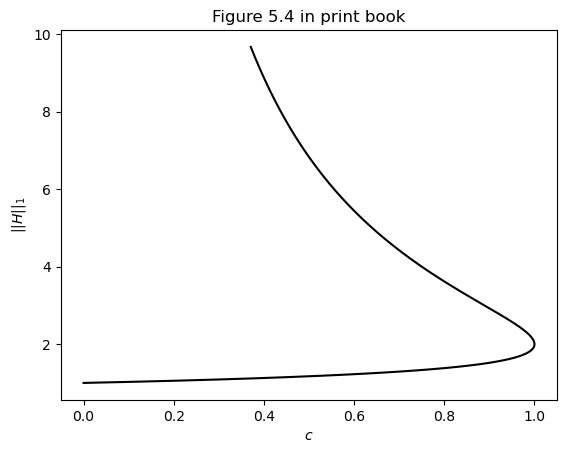

In [4]:
heq_graph_continuation();

## Section 5.3: Projects

### Section 5.3.1: More on heat transfer

There are more interesting examples of conductive-radiative heat
transfer in <cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>. 
Extend the methods from this chapter to
the more general boundary conditions in equations 10a-10b on
page 274 of<cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>.
    

### Section 5.3.2: Advanced Continuation

Explore solving the H-equation and the buckling beam equation with
a more sophisticated continuation code that the simple one we used
in this section. The Julia package __BifurcationKit.jl__
<cite data-cite="bifkit"><a href="siamfa.html#bifkit">(Vel20)</cite>
is a good place to start.